<a href="https://colab.research.google.com/github/TanyaAggrawal/AI_NLP/blob/main/KRS_AR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RESERVOIR WATER LEVEL PREDICTIVE MODELLING OF KRS RESERVOIR,KARNATAKA.

The dataset is KRS.csv. In there the column 'NET_FINAL' is a calculated column in TMC. It is calculated by the formula (PRESENT_STORAGE_TMC*9505x10^5+INFLOW_CUSECS-OUTFLOW_CUSECS)/9504X10^5. The factor 9504x10^5 is the multiplication factor of converting TMC to CUSECS. For KRS Reservoir the MDDL(minimum drawn down level) is 74 FT. 

Importing the requried libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from sklearn.model_selection import train_test_split
import datetime as dt
import seaborn as sns

In [ ]:
data=pd.read_csv('KRS.csv')
data.drop('UNIQUE_KEY',axis=1,inplace=True)
data.drop('RESERVOIR',axis=1,inplace=True)
data=data.dropna()
data=data.reset_index(drop=True)
data.head()

,SL_NO,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS
0,51,2011,1,2011-01-01,46.42,122.59,2029,2000
1,52,2011,1,2011-01-02,46.54,122.68,3084,1490
2,53,2011,1,2011-01-03,46.64,122.75,2776,1491
3,54,2011,1,2011-01-04,46.69,122.79,2311,1491
4,55,2011,1,2011-01-05,46.70,122.80,1847,1491


In [ ]:
data = data.drop(data.index[499])
data['RES_LEVEL_FT']=data['RES_LEVEL_FT'].astype(float)
data['INFLOW_CUSECS']=data['INFLOW_CUSECS'].astype(float)
data['OUTFLOW_CUECS']=data['OUTFLOW_CUECS'].astype(float)


In [ ]:
#data['RES_LEVEL_FT'] = pd.to_numeric(data['RES_LEVEL_FT'], errors='coerce')
#data['INFLOW_CUSECS'] = pd.to_numeric(data['INFLOW_CUSECS'], errors='coerce')
#data['OUTFLOW_CUSECS'] = pd.to_numeric(data['OUTFLOW_CUECS'], errors='coerce')
#data['STORAGE_CONSD_IN_OUT']=pd.to_numeric(data['STORAGE_CONSD_IN_OUT'],errors='coerce')
data.dtypes

SL_NO                    int64
YEAR                     int64
WEEK_NO                  int64
FLOW_DATE               object
PRESENT_STORAGE_TMC    float64
RES_LEVEL_FT           float64
INFLOW_CUSECS          float64
OUTFLOW_CUECS          float64
dtype: object

In [ ]:
data.dtypes

SL_NO                    int64
YEAR                     int64
WEEK_NO                  int64
FLOW_DATE               object
PRESENT_STORAGE_TMC    float64
RES_LEVEL_FT           float64
INFLOW_CUSECS          float64
OUTFLOW_CUECS          float64
dtype: object

In [ ]:
data["NET_FINAL"]=(data["PRESENT_STORAGE_TMC"]*(9504*(10**5))+data["INFLOW_CUSECS"]-data["OUTFLOW_CUECS"])/(9504*(10**5))

In [ ]:
data['NET_FINAL']=pd.to_numeric(data['NET_FINAL'],errors='coerce')
data


,SL_NO,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,NET_FINAL
0,51,2011,1,2011-01-01,46.42,122.59,2029.0,2000.0,46.420000
1,52,2011,1,2011-01-02,46.54,122.68,3084.0,1490.0,46.540002
2,53,2011,1,2011-01-03,46.64,122.75,2776.0,1491.0,46.640001
3,54,2011,1,2011-01-04,46.69,122.79,2311.0,1491.0,46.690001
4,55,2011,1,2011-01-05,46.70,122.80,1847.0,1491.0,46.700000
...,...,...,...,...,...,...,...,...,...
3308,43915,2020,50,2020-12-12,43.04,120.00,3496.0,3308.0,43.040000
3309,43916,2020,50,2020-12-13,43.02,119.98,3197.0,3300.0,43.020000
3310,43917,2020,50,2020-12-14,42.98,119.95,3026.0,3273.0,42.980000
3311,43918,2020,50,2020-12-15,42.92,119.90,2530.0,3068.0,42.919999


In [ ]:
data.dtypes

SL_NO                    int64
YEAR                     int64
WEEK_NO                  int64
FLOW_DATE               object
PRESENT_STORAGE_TMC    float64
RES_LEVEL_FT           float64
INFLOW_CUSECS          float64
OUTFLOW_CUECS          float64
NET_FINAL              float64
dtype: object

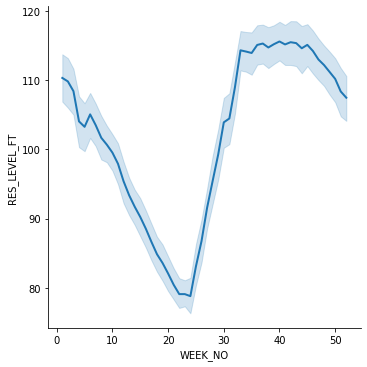

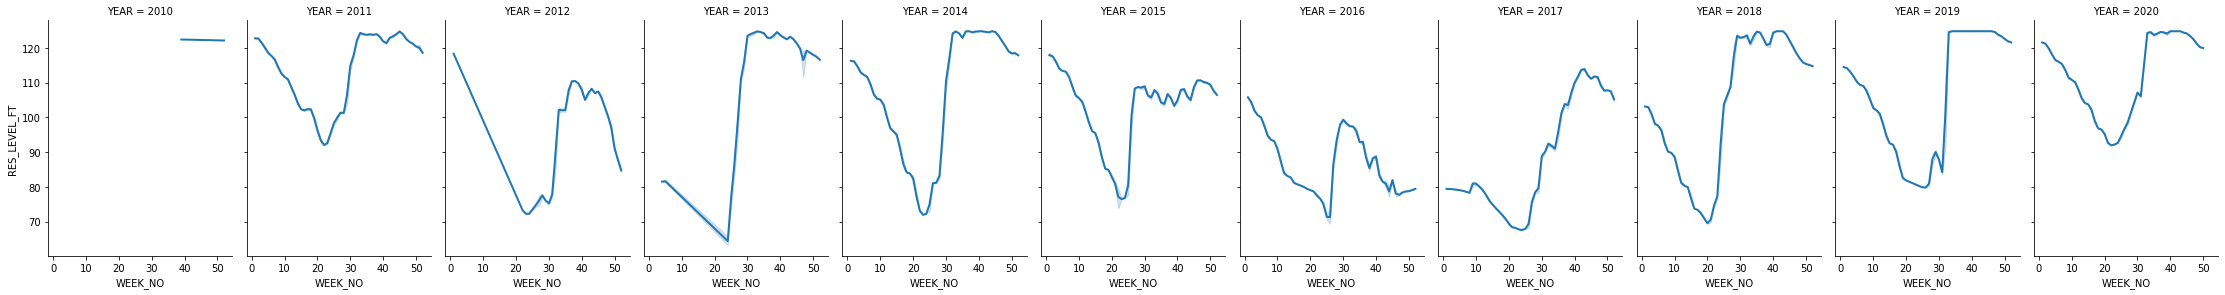

In [ ]:
g=sns.relplot(data=data,x="WEEK_NO",y="RES_LEVEL_FT",kind="line",linewidth=2)
g1=sns.relplot(data=data,x="WEEK_NO",y="RES_LEVEL_FT",kind="line",linewidth=2,col="YEAR",height=4,aspect=0.7)

LINE PLOT OF RESERVOIR WATER LEVEL with YEAR

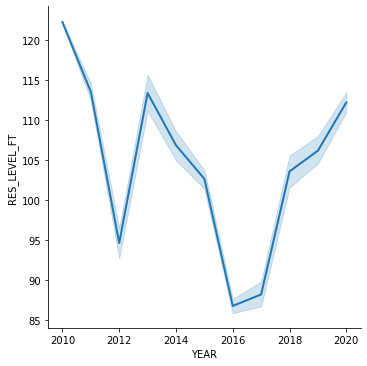

In [ ]:
sns.relplot(data=data,x="YEAR",y="RES_LEVEL_FT",kind="line",linewidth=2)

In [ ]:
data.drop('SL_NO', axis=1, inplace=True)

INDEXING THE DATASET with FLOW_DATE


In [ ]:
data['FLOW_DATE']=pd.to_datetime(data['FLOW_DATE'], infer_datetime_format=True)
data['FLOW_DATE']=data['FLOW_DATE'].map(dt.datetime.toordinal)
indexDataset = data.set_index(['FLOW_DATE'])
indexDataset.head()

,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,NET_FINAL
FLOW_DATE,,,,,,,
734138,2011,1,46.42,122.59,2029.0,2000.0,46.420000
734139,2011,1,46.54,122.68,3084.0,1490.0,46.540002
734140,2011,1,46.64,122.75,2776.0,1491.0,46.640001
734141,2011,1,46.69,122.79,2311.0,1491.0,46.690001
734142,2011,1,46.70,122.80,1847.0,1491.0,46.700000


MAKING THE DATASET STATIONARY

In [ ]:
indexDataset.shift(1)
indexed_diff = indexDataset.diff(periods=1)
indexed_diff = indexed_diff[1:]
indexed_diff.head()

,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,NET_FINAL
FLOW_DATE,,,,,,,
734139,0.0,0.0,0.12,0.09,1055.0,-510.0,0.120002
734140,0.0,0.0,0.10,0.07,-308.0,1.0,0.100000
734141,0.0,0.0,0.05,0.04,-465.0,0.0,0.050000
734142,0.0,0.0,0.01,0.01,-464.0,0.0,0.010000
734143,0.0,0.0,0.04,0.03,309.0,0.0,0.040000


PLOT OF THE STATIONARY DATASET'S STORAGE_CONSD_IN_OUT

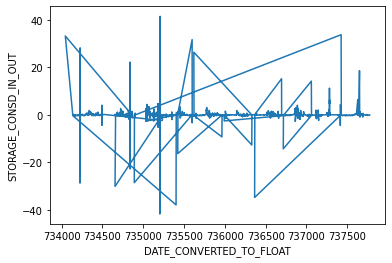

In [ ]:
plt.xlabel("DATE_CONVERTED_TO_FLOAT")
plt.ylabel("STORAGE_CONSD_IN_OUT")
plt.plot(indexed_diff['NET_FINAL'])


AR MODEL PREDICTION

In [ ]:
from sklearn.model_selection import train_test_split 
X = indexed_diff['NET_FINAL'].values
train = X[0:2660]# train data
test = X[2660:3312]                 
predictions = []
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

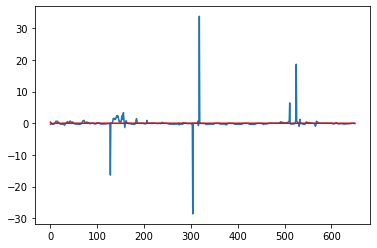

In [ ]:
predictions = model_ar_fit.predict(start=2660,end=3310)
plt.plot(test)
plt.plot(predictions,color='red')

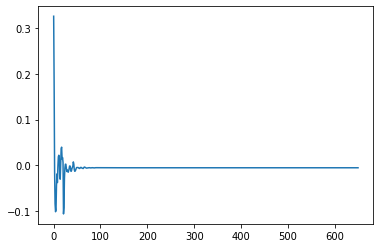

In [ ]:
plt.plot(predictions)

In [ ]:

mse=mean_squared_error(test,predictions)

In [ ]:
np.sqrt(mse)

2.0474688541052606

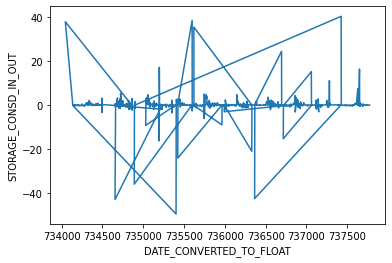

In [ ]:
plt.xlabel("DATE_CONVERTED_TO_FLOAT")
plt.ylabel("STORAGE_CONSD_IN_OUT")
plt.plot(indexed_diff['RES_LEVEL_FT'])

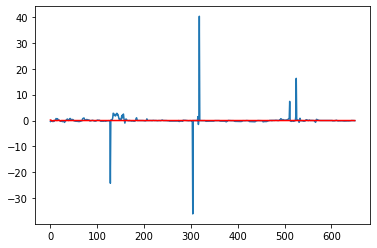

In [ ]:
from sklearn.model_selection import train_test_split 
X = indexed_diff['RES_LEVEL_FT'].values
train = X[0:2660]# train data
test = X[2660:]                 
predictions = []
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)
predictions = model_ar_fit.predict(start=2660,end=3310)
plt.plot(test)
plt.plot(predictions,color='red')

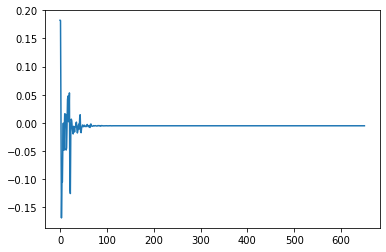

In [ ]:
plt.plot(predictions)


In [ ]:
mse1=mean_squared_error(test,predictions)

In [ ]:
np.sqrt(mse1)

2.4660705242752563